# Zählen heller Objekte in Bildern
Ein häufiger Anwendungsfall für die Bildverarbeitung im biologischen Kontext ist das Zählen von Bereichen mit hoher Signalintensität, die von einem Hintergrund mit niedriger Intensität umgeben sind. Die Schwellenwertbildung ist in diesem Szenario die Methode der Wahl. Wir demonstrieren dies mit Otsus Schwellenwertmethode (Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979)

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")

<Apple M1 Max on Platform: Apple (2 refs)>

Loaded image size: (254, 256)


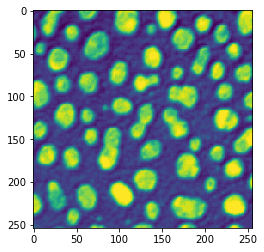

In [2]:
# load data
image = imread('../../data/blobs.tif')
print("Loaded image size: " + str(image.shape))

cle.imshow(image)

Wir haben gerade einen einfachen Bildverarbeitungsworkflow eingerichtet, der zu einem Labelbild führt.

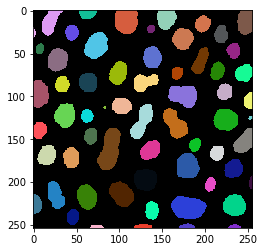

In [3]:
# process the image
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

# show result
cle.imshow(labeled, labels=True)

Die maximale Intensität in einem Labelbild entspricht der Anzahl der Objekte.

In [4]:
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62.0


## Übung
Entfernen Sie die Labels, die den Bildrand berühren, und zählen Sie die Objekte erneut.